In [4]:
import pandas as pd
house = pd.read_csv("https://raw.githubusercontent.com/icaromisquita/archives/main/housing-classification-iter-0-2.csv")
house.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


###Setting X and y

In [5]:
y= house["Expensive"]
X_num = house
X_num = X_num.drop(columns="Expensive")
print(X_num.head())
print(y)

   LotArea  LotFrontage  TotalBsmtSF  BedroomAbvGr  Fireplaces  PoolArea  \
0     8450         65.0          856             3           0         0   
1     9600         80.0         1262             3           1         0   
2    11250         68.0          920             3           1         0   
3     9550         60.0          756             3           1         0   
4    14260         84.0         1145             4           1         0   

   GarageCars  WoodDeckSF  ScreenPorch  
0           2           0            0  
1           2         298            0  
2           2           0            0  
3           3           0            0  
4           3         192            0  
0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: Expensive, Length: 1460, dtype: int64


###Data splitting

In [59]:
from sklearn.model_selection import train_test_split

X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, 
                                                            y, 
                                                            test_size=0.2, 
                                                            random_state=123)

Creating a Pipeline

In [67]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
'''
# 1. initialize transformers &amp; model
imputer = SimpleImputer(strategy="median")
dtree = DecisionTreeClassifier(max_depth=4,
                               min_samples_leaf=10)
 
# 2. Create a pipeline*
pipe = make_pipeline(imputer, dtree)
 
# 3. Fit the pipeline to the training data
pipe.fit(X_num_train, y_train)
 
# 4. Use the pipeline to make predictions
pipe.predict(X_num_test)
'''

'\n# 1. initialize transformers &amp; model\nimputer = SimpleImputer(strategy="median")\ndtree = DecisionTreeClassifier(max_depth=4,\n                               min_samples_leaf=10)\n \n# 2. Create a pipeline*\npipe = make_pipeline(imputer, dtree)\n \n# 3. Fit the pipeline to the training data\npipe.fit(X_num_train, y_train)\n \n# 4. Use the pipeline to make predictions\npipe.predict(X_num_test)\n'

In [68]:
# 1. initialize transformers &amp; model
imputer = SimpleImputer()
dtree = DecisionTreeClassifier()
 
# 2. Create a pipeline*
pipe = make_pipeline(imputer, dtree)

param_grid = {
    'simpleimputer__strategy': ['mean', 'median'],
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(2, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(5, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }
    
from sklearn.model_selection import GridSearchCV
 
search = GridSearchCV(pipe, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use, 
                      verbose=1) # we want informative outputs during the training process

In [69]:
search.fit(X_num_train, y_train)

Fitting 5 folds for each of 1120 candidates, totalling 5600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(2, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(5, 40, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             scoring='accuracy', verbose=1)

In [70]:
search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 10,
 'simpleimputer__strategy': 'mean'}

In [28]:
search.best_score_

0.9246689409779538

###Vizualizing the tree - Brute Force Mode

In [61]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

#pipe[0].fit(X_num_train)
#X_num_impu_train = pipe[0].transform(X_num_train)

my_imputer = SimpleImputer()

# fit
my_imputer.fit(X_num_train)

# transform train 
X_num_imputed_train = my_imputer.transform(X_num_train)



# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_samples_split=10)

# 3. fit the model to the train data
my_tree.fit(X = X_num_imputed_train, 
            y = y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10)

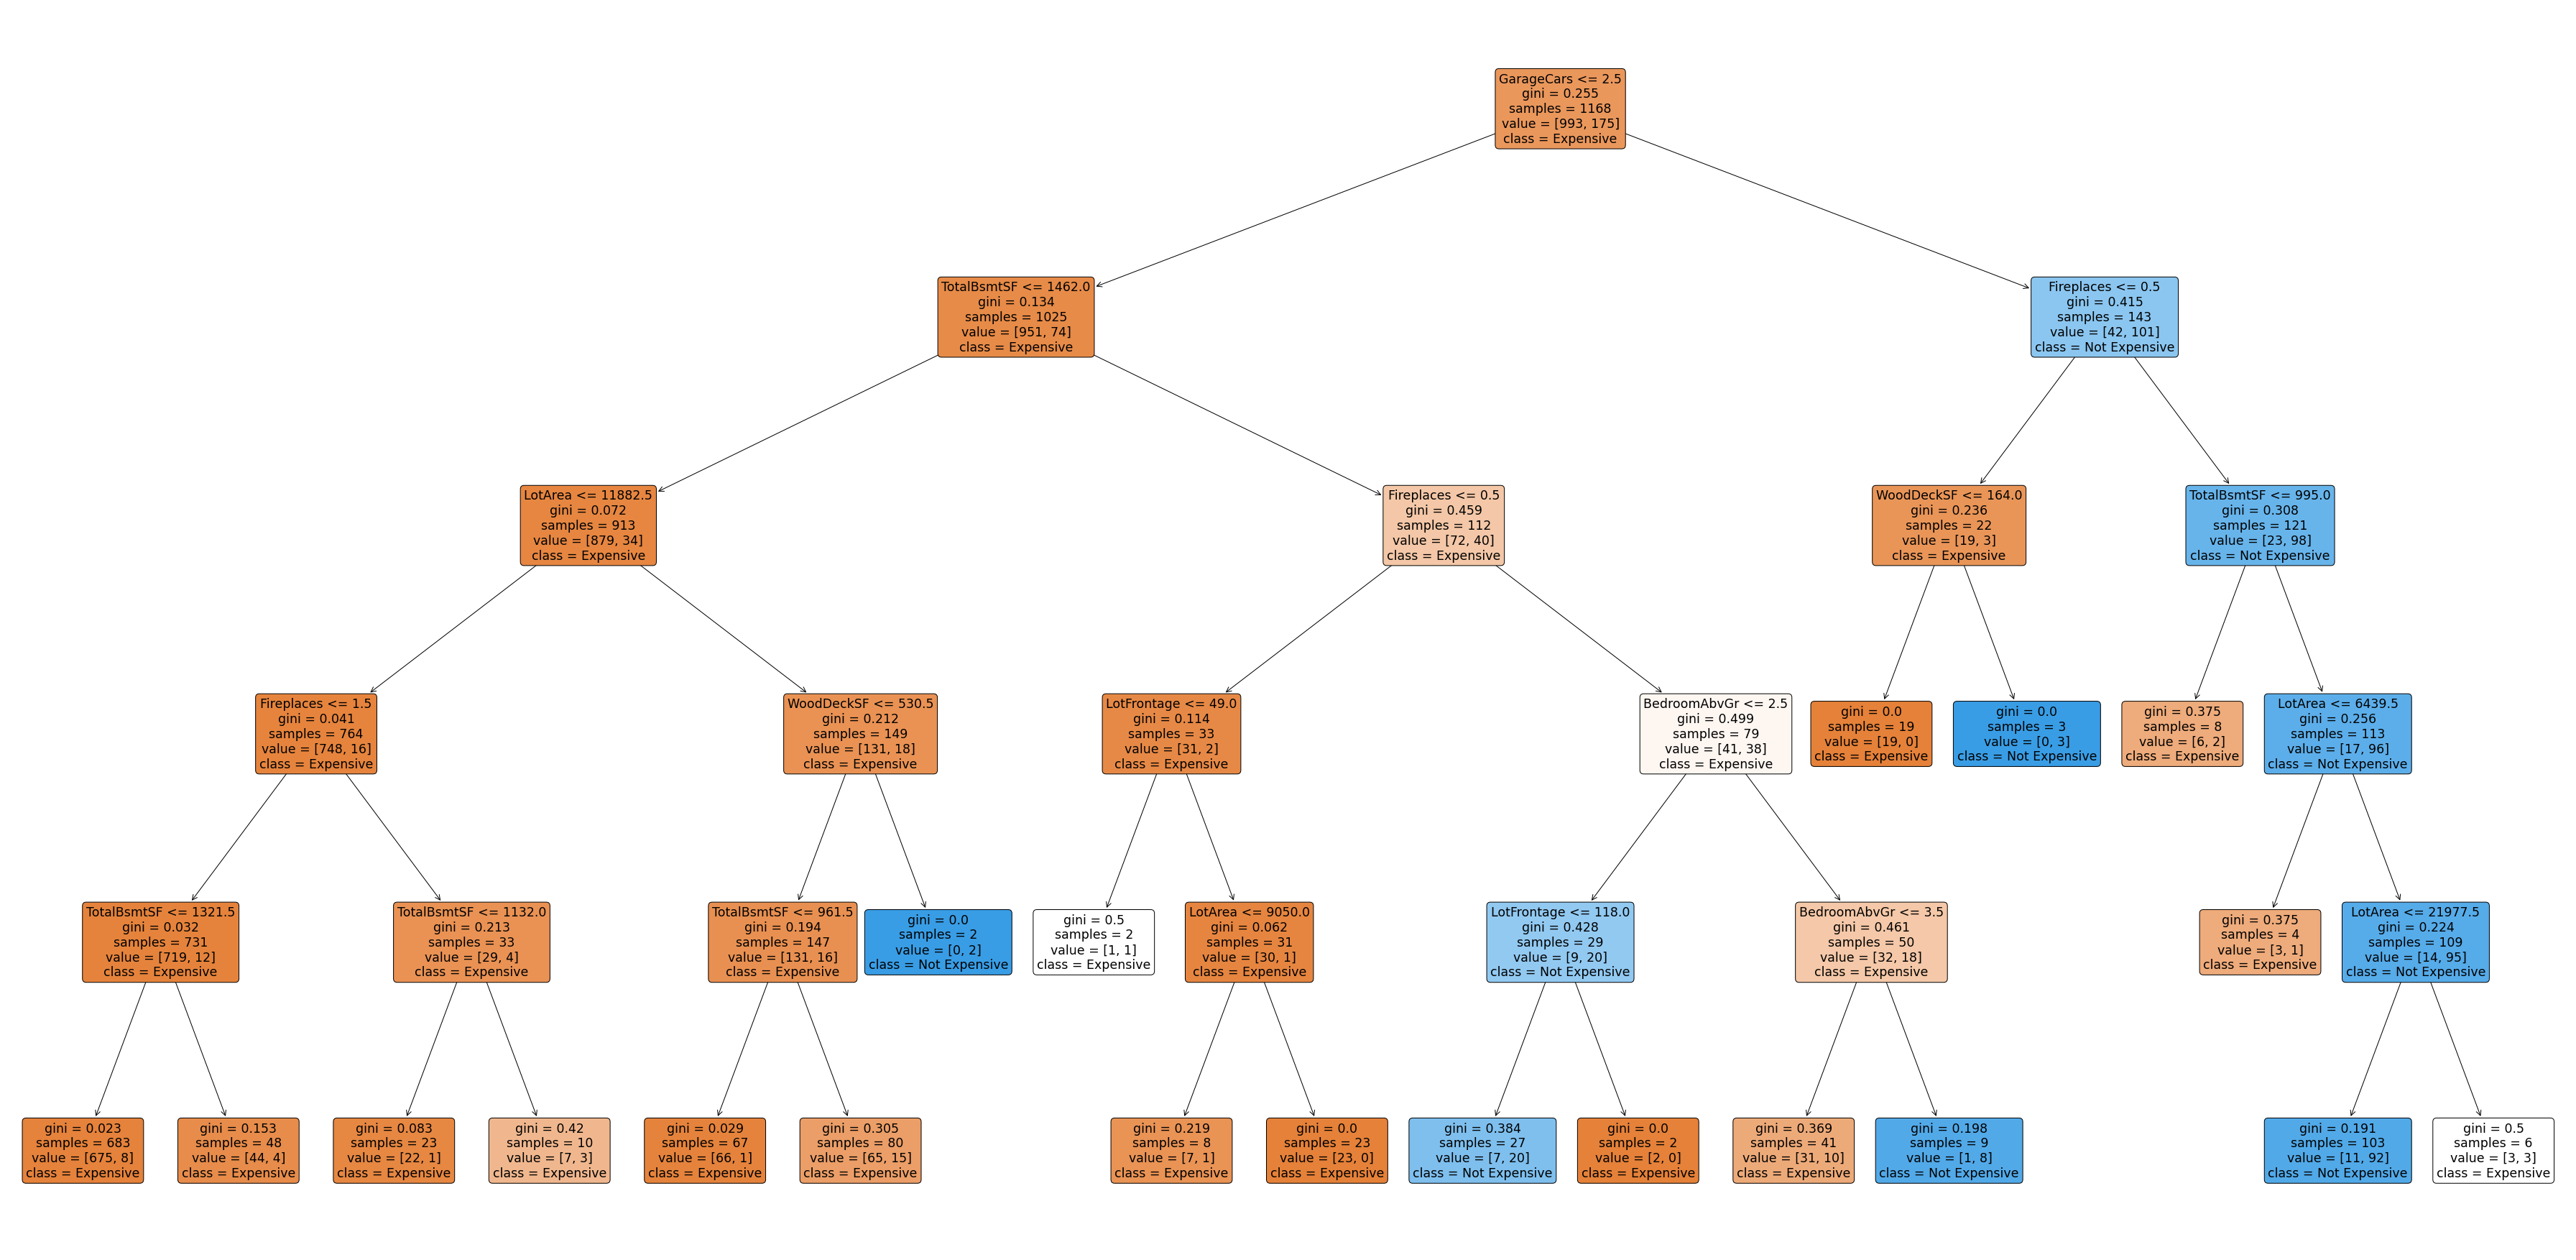

In [64]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Expensive','Not Expensive'], 
     feature_names=X.columns
     );